In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Law of large numbers

The **strong law of large numbers** states that the empirical mean estimator of an i.i.d sample of $\mathbb{L}^1$ random variables $(X_n)_{n\geq 1}$ converges almost surely to its expectation $\mu = \mathbb{E}[X_1]$:

$$
\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i \xrightarrow{a.s} \mu.
$$


Moreover if the variables are also in $\mathbb{L}^2$, the Central Limit Theorem guarantees an asymptotic rate of convergence of $\mathcal{\frac{1}{\sqrt{n}}}$.

Note that a weaker form, called the **weak law of large numbers** guarantees the convergence in probability (which is implied by the almost sure convergence) but holds with more general hypothesis.

Both laws can be relaxed in the case of dependent variables. Intuitively, if the dependency between $X_i$ and $X_j$ fades away fast enough when $\lvert i-j \rvert \rightarrow \infty$, then $\bar{X}_n$ is similar to the mean of an independent sample in the limit $n\rightarrow \infty$. 

This intuition can be made more precise. Assume that $X_n\in \mathbb{L}^2$ for all $n\geq 1$ and there exists a sequence of nonnegative real numbers $(\varepsilon_n)_{n\in \mathbb{N}}$ such that $Cov(X_i, X_j)\leq \varepsilon_{\lvert i-j\rvert}$. Then:

<br/>

* if $\varepsilon_n \xrightarrow[n\rightarrow \infty]{} 0$, $\ $ $\bar{X}_n \ \xrightarrow[n\rightarrow \infty]{\mathbb{L}^2, \ \mathbb{P}} \mu $,

<br/> 
<br/>

* if $\sum_n \varepsilon_n < \infty$, $\ $ $\bar{X}_n \ \xrightarrow[n\rightarrow \infty]{\text{a.s}} \mu $ and $Var(\bar{X}_n) = \mathcal{O}(\frac{1}{n})$.


This notebook aims at showing empirical evidence of this convergence regime by considering a Gaussian sample $X\sim \mathcal{N}(\mathbf{0}, \mathbf{C})$ with $\mathbf{C}_{ij} = \frac{\alpha}{(1+\lvert i-j\rvert)^{\beta}} + \gamma$. By playing the parameters $\alpha$, $\beta$ and $\gamma$, one can exhibit all convergence regimes:

* $(\varepsilon_n)_{n\in \mathbb{N}}$ is summable ($\gamma = 0$, $\beta>1$),
* $(\varepsilon_n)_{n\in \mathbb{N}}$ converges to zero but is not summable ($\gamma = 0$, $\beta\leq 1$),
* $(\varepsilon_n)_{n\in \mathbb{N}}$ does not converge to zero ($\gamma > 0$).

In [2]:
N = int(1e3)

def rho(i: int, j: int) -> float:
    return alpha * (1 + np.abs(i-j)) ** (-beta) + gamma

alpha = 1.0
beta = 0.5
gamma = 0.0
Cov = np.fromfunction(rho, (N, N), dtype=float)

# Correlated sample
sample = np.random.multivariate_normal(np.zeros(N), Cov)

### Empirical mean and $\mathbb{L}^2$ error

In [3]:
means = np.empty(N)
stds = np.empty(N)

for i in range(N):
    means[i] = np.mean(sample[: i + 1])
    stds[i] = np.std(sample[: i + 1]) / np.sqrt(i + 1)

### Conclusion

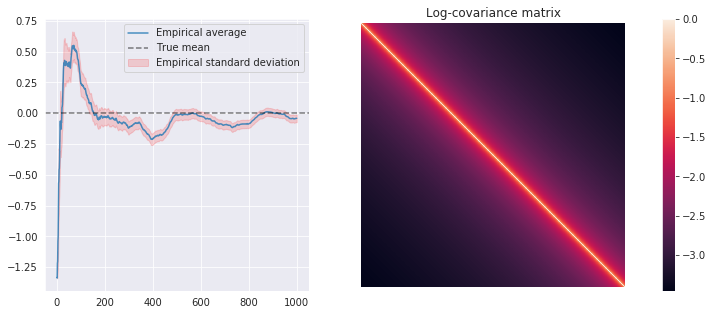

In [4]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(figsize=(13, 5), nrows=1, ncols=2)
    
    n_samples = np.arange(1, N + 1)
    
    ax = axes[0]
    ax.plot(n_samples, means, label='Empirical average', alpha=0.8)
    ax.fill_between(n_samples, means - stds, means + stds, 
                    alpha=0.15, 
                    color='red',
                    label='Empirical standard deviation'
                    )
    ax.axhline(y=0.0, 
               color='black', 
               linestyle='dashed', 
               alpha=0.5,
               label='True mean'
              )
    ax.legend(loc='upper right')

    ax = axes[1]
    im = ax.imshow(np.log(Cov))
    ax.set_title('Log-covariance matrix')
    #     im = ax.imshow(Cov)
#     ax.set_title('Covariance matrix')
    ax.axis('off')
    fig.colorbar(im, ax=axes.ravel().tolist(), shrink=1.0)
    
plt.show()